# CA1 Deep Learning Assignment [CNN]

- Name: Jaysoorya Rajendran
- Admin Number: P2309024
- Class: DAAA/FT/2A/01

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1_l2

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Exploratory Data Analysis

- **(1) Problem Identified**: 11 Images of Carrots found in the Beans Training Dataset
  - **Solution**: Deleted these 11 Images
  - **Reasoning**: Images are in the wrong class and can disrupt model training

- **(2) Problem Identified**: Many of the Images in the beans directory had exact copies within the same dataset
  - **Solution**: Deleted them
  - **Reasoning**: These images provide do not help the model with training as its training on a seen-before image

- **(3) Problem Identified**: Many of the Images in all the datasets had the given vegetables along with other irrelevant vegetables within the same images
  - **Solution**: No Changes made to the images
  - **Reasoning**: These images help to reduce overfitting as they ensure the model cannot simply recognize carrots in specific contexts. Instead, they encourage the model to learn more generalized details of carrots.

- **(4) Observation**: Many of the Images in some datasets, such as the Carrots dataset were already flipped vertically or zoomed into
  - **Action Taken**: No Changes made to the images
  - **Reasoning**: These images can help the model learn the specific details of the vegetables as they have already have the data augmentation applied to them, which greatly helps the model learn more and faster about the specific vegetables

## Visualizing the dataset ( 37 x 37 )

Found 9032 files belonging to 15 classes.


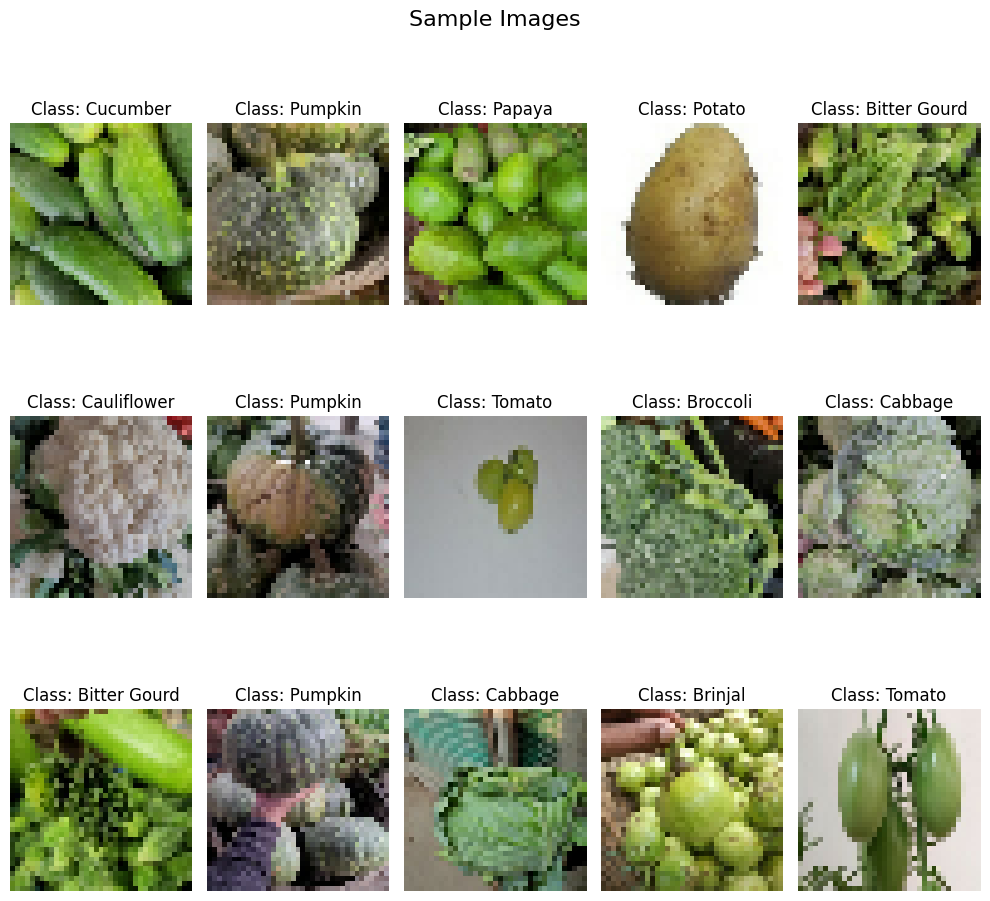

In [4]:
visual_dir = "Dataset for CA1 part A - AY2425S1/train"

veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    visual_dir,
    image_size=(37, 37), 
    color_mode='rgb',
    batch_size=32,
    shuffle=True
)

all_images = []
all_labels = []

for images, labels in train_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

images = np.concatenate(all_images)
labels = np.concatenate(all_labels)

images = images / 255.0

plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].squeeze())  
    plt.title(f"Class: {veggies[labels[i]]}", fontsize=12)    
    plt.axis('off')
plt.suptitle('Sample Images', fontsize=16)
plt.tight_layout()
plt.show()

## Data Grayscaled ( 37 x 37 )
- Now, let's explore the dataset after converting the images to grayscale. This transformation simplifies the visual information to a single channel, offering a different perspective on the dataset's characteristics.

Found 9032 files belonging to 15 classes.


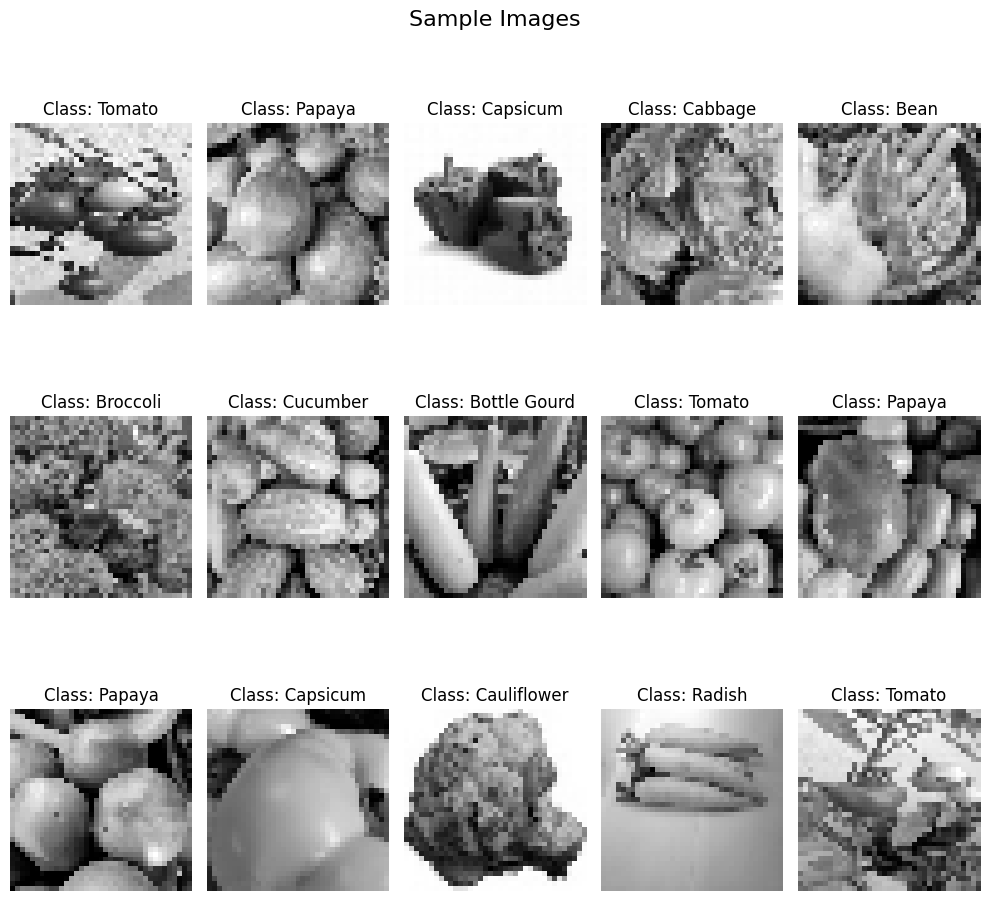

In [5]:
visual_dir = "Dataset for CA1 part A - AY2425S1/train"

veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    visual_dir,
    image_size=(37, 37), 
    color_mode='grayscale', # This converts it to greyscale
    batch_size=32,
    shuffle=True
)

all_images = []
all_labels = []

for images, labels in train_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

images = np.concatenate(all_images)
labels = np.concatenate(all_labels)

images = images / 255.0

plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap = 'gray')  
    plt.title(f"Class: {veggies[labels[i]]}", fontsize=12)    
    plt.axis('off')
plt.suptitle('Sample Images', fontsize=16)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Assigning the Images and their corresponding Labels to X and y

- To prepare the dataset for training, let's assign the images to X and their corresponding labels to y. This step organizes the data for further processing and model training.

# Training Dataset

In [1]:
import tensorflow as tf
import numpy as np

train_dir = "Dataset for CA1 part A - AY2425S1/train"

veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Load images from directory with data augmentation
train_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(37, 37),
    color_mode='grayscale',
    shuffle=True,
    seed=42
)

# Extract images and labels from the augmented dataset
all_images = []
all_labels = []

for images, labels in train_dataset:
    all_images.append(images)
    all_labels.append(labels)

X_train_37 = np.concatenate(all_images)
y_train_37 = np.concatenate(all_labels)

print("\nTraining Images Shape:", X_train_37.shape)
print("Training Labels Shape:", y_train_37.shape)

print("\nTraining Images Data Type:", type(X_train_37))
print("Training Labels Data Type:", type(y_train_37))

for i in range(1):  # Print first images as a sample
    print(f"\nImage shape: {X_train_37[i].shape}")

Found 9028 files belonging to 15 classes.

Training Images Shape: (9028, 37, 37, 1)
Training Labels Shape: (9028,)

Training Images Data Type: <class 'numpy.ndarray'>
Training Labels Data Type: <class 'numpy.ndarray'>

Image shape: (37, 37, 1)


# Test Dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

test_dir = "Dataset for CA1 part A - AY2425S1/test"

veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(37, 37), 
    color_mode = 'grayscale',
    shuffle=True,
)

all_images = []
all_labels = []

for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

images = np.concatenate(all_images)
labels = np.concatenate(all_labels)

X_test_37 = images
y_test_37 = labels

print("\nTest Images shape:", X_test_37.shape)
print("Test Labels shape:", y_test_37.shape)

print("\nTest Images DataType:", type(X_test_37))
print("Test Labels DataType:", type(y_test_37))

for i in range(1):  # Print first images as a sample
    print(f"\nImage shape: {X_test_37[i].shape}")

Found 3000 files belonging to 15 classes.

Test Images shape: (3000, 37, 37, 1)
Test Labels shape: (3000,)

Test Images DataType: <class 'numpy.ndarray'>
Test Labels DataType: <class 'numpy.ndarray'>

Image shape: (37, 37, 1)


# Validation Dataset

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

val_dir = "Dataset for CA1 part A - AY2425S1/validation"

veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(37, 37), 
    color_mode = 'grayscale',
    shuffle=True,
)

all_images = []
all_labels = []

for images, labels in val_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

images = np.concatenate(all_images)
labels = np.concatenate(all_labels)

X_val_37 = images
y_val_37 = labels


print("\nValidation Images shape:", X_val_37.shape)
print("Validation Labels shape:", y_val_37.shape)

print("\nValidation Images DataType:", type(X_val_37))
print("Validation Labels DataType:", type(y_val_37))


for i in range(1):  # Print first 5 images as a sample
    print(f"\nImage shape: {X_val_37[i].shape}")

Found 3000 files belonging to 15 classes.

Validation Images shape: (3000, 37, 37, 1)
Validation Labels shape: (3000,)

Validation Images DataType: <class 'numpy.ndarray'>
Validation Labels DataType: <class 'numpy.ndarray'>

Image shape: (37, 37, 1)


## Image Averaging
- This code visualizes the average image for each class in a dataset containing various vegetables. It iterates over each class, calculates the average image by taking the mean of all images belonging to that class, and plots the average image on a subplot. The subplot titles correspond to the class names. This visualization provides a summary of the dataset, showing the typical features associated with each vegetable class.

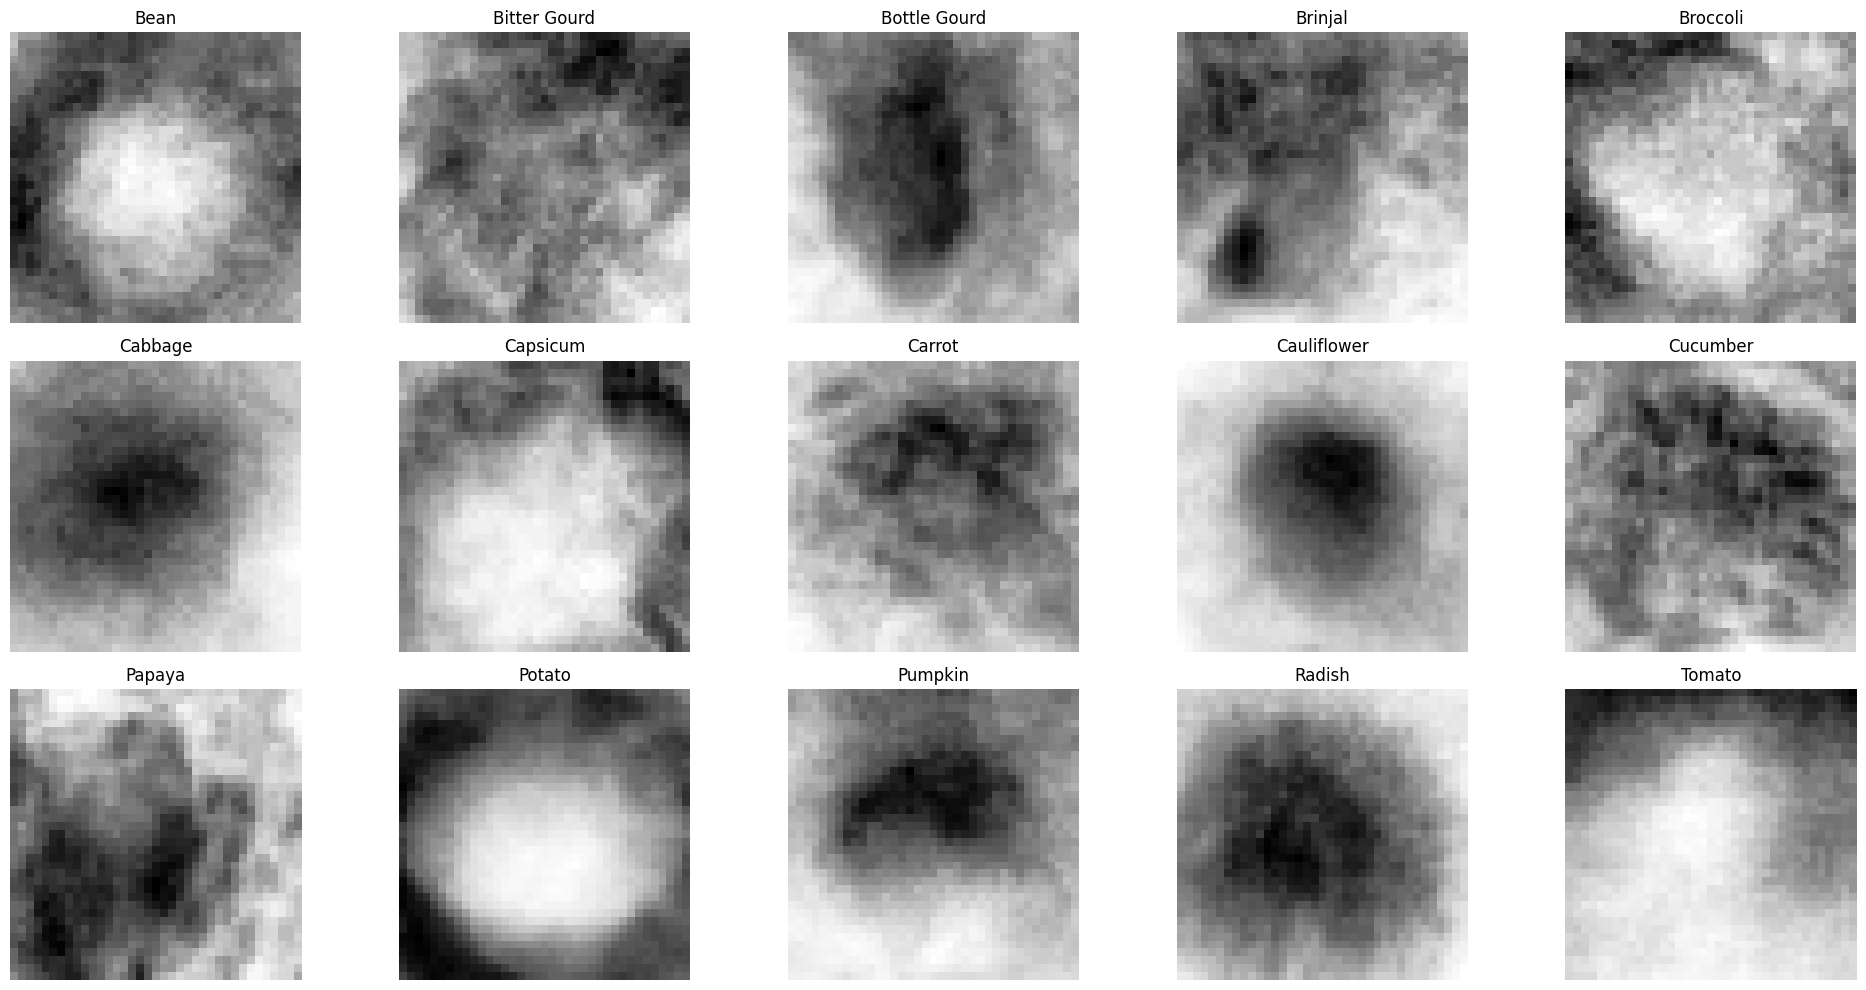

In [9]:
# Define the number of classes and the class names
veggies = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
         'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
num_classes = len(veggies)
class_names = veggies 

num_samples_per_class = 200
# Create subplots
fig, ax = plt.subplots(3, 5, figsize=(20, 10))

# Iterate over each class and plot the average image
for idx, subplot in enumerate(ax.ravel()):
    if idx < num_classes:
        # Calculate the average image for the current class
        class_images = X_train_37[y_train_37 == idx]  # Filter images for the current class
        avg_image = np.mean(class_images, axis=0) / 255  # Compute average image

        # Since all images are greyscale, no need to check for channels
        subplot.imshow(avg_image.squeeze(), cmap='Greys')  # Display the greyscale image

        subplot.set_title(class_names[idx])  # Set the class name as the subplot title
        subplot.axis("off")

plt.tight_layout()
plt.show()

# Class Imbalance 

- Using this code, we can see that there is a clear imbalance between some of our classes in this dataset

In [10]:
num_classes = len(veggies)
num_images_per_class = []

for class_idx, veggie in enumerate(veggies):
    class_images = X_train_37[y_train_37 == class_idx]
    num_images_per_class.append(len(class_images))
    print(f"{veggie}: {len(class_images)} images")

print("\nNumber of images per class:", num_images_per_class)

Bean: 784 images
Bitter Gourd: 720 images
Bottle Gourd: 441 images
Brinjal: 868 images
Broccoli: 750 images
Cabbage: 503 images
Capsicum: 351 images
Carrot: 256 images
Cauliflower: 587 images
Cucumber: 812 images
Papaya: 566 images
Potato: 377 images
Pumpkin: 814 images
Radish: 248 images
Tomato: 955 images

Number of images per class: [784, 720, 441, 868, 750, 503, 351, 256, 587, 812, 566, 377, 814, 248, 955]


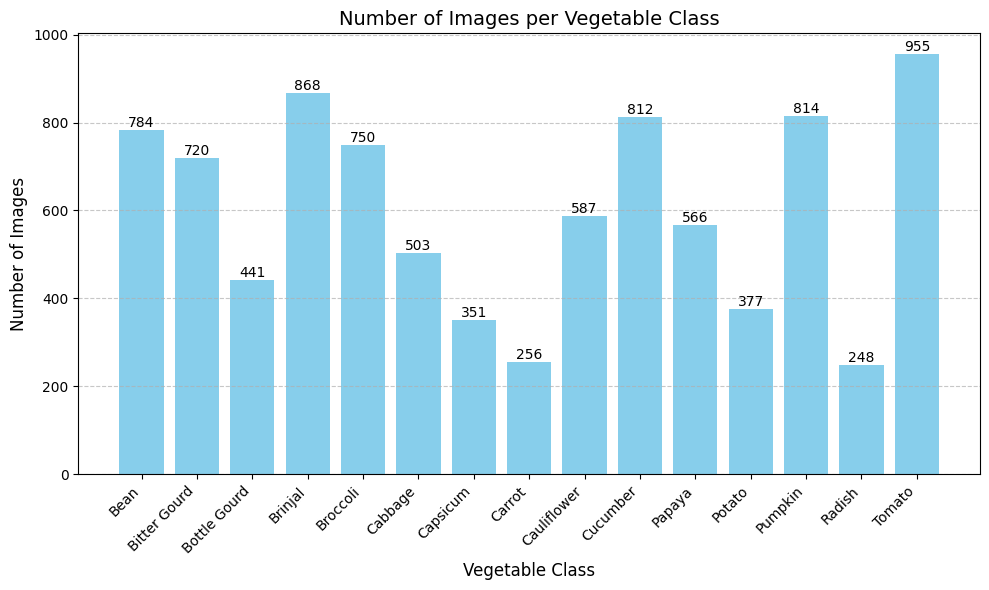

In [11]:
# Plotting the bar chart with numbers on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(veggies, num_images_per_class, color='skyblue')

# Adding numbers on top of each bar
for bar, num_images in zip(bars, num_images_per_class):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), num_images,
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Vegetable Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images per Vegetable Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

## Class Weights

- To address the Class Imbalance, I used Class Weights. They assign more weight to minority classes and less weight to majority classes, ensuring that the model pays equal attention to all classes, which helps mitigate class imbalance and improve model genralization and performance

In [12]:
total_samples = sum(num_images_per_class)

# Calculate class weights
class_weights = {i: total_samples / count for i, count in enumerate(num_images_per_class)}

# Normalize the class weights (optional)
max_weight = max(class_weights.values())
class_weights = {class_id: weight / max_weight for class_id, weight in class_weights.items()}

## One-Hot Encoding

- One-hot encoding is applied to categorical variables like class labels to represent them as binary vectors. This conversion ensures that the model interprets classes as distinct categories rather than ordinal values. It helps prevent the model from assuming any ordinal relationship between classes and enables it to treat each class equally during training, improving performance and avoiding bias in classification tasks.

In [13]:
y_train_37 = to_categorical(y_train_37)
y_test_37 = to_categorical(y_test_37)
y_val_37 = to_categorical(y_val_37)

num_classes = y_test_37.shape[1]

## Data Standardization

- We standardize the data using 255 for normalization as it maintains the original intensity range of the pixel values while ensuring they are within a suitable range for machine learning algorithms.

In [14]:
print("Max: ", np.max(X_train_37))
print("Min: ", np.min(X_train_37))

print("\nCurrent Range:", np.max(X_train_37) - np.min(X_train_37))

Max:  255.0
Min:  0.0

Current Range: 255.0


In [15]:
# Normalize the pixel values to be between 0 and 1
X_train_37 = X_train_37 / 255.0
X_val_37 = X_val_37 / 255.0
X_test_37 = X_test_37 / 255.0

In [16]:
print("Max: ", np.max(X_train_37))
print("Min: ", np.min(X_train_37))

print("\nCurrent Range:", np.max(X_train_37) - np.min(X_train_37))

Max:  1.0
Min:  0.0

Current Range: 1.0


# Data Normalization

- This preprocessing involves scaling the input features so that they have a mean of 0 and a standard deviation of 1, based on the statistics computed during the adaptation step. By applying normalization, the input data is transformed to have consistent scales across features, which can improve the convergence and performance of machine learning models during training.

In [17]:
pre_processing_v1 = Normalization()
pre_processing_v1.adapt(X_train_37)

X_train_preprocessed_37 = pre_processing_v1(X_train_37)
X_test_preprocessed_37 = pre_processing_v1(X_test_37)
X_val_preprocessed_37 = pre_processing_v1(X_val_37)

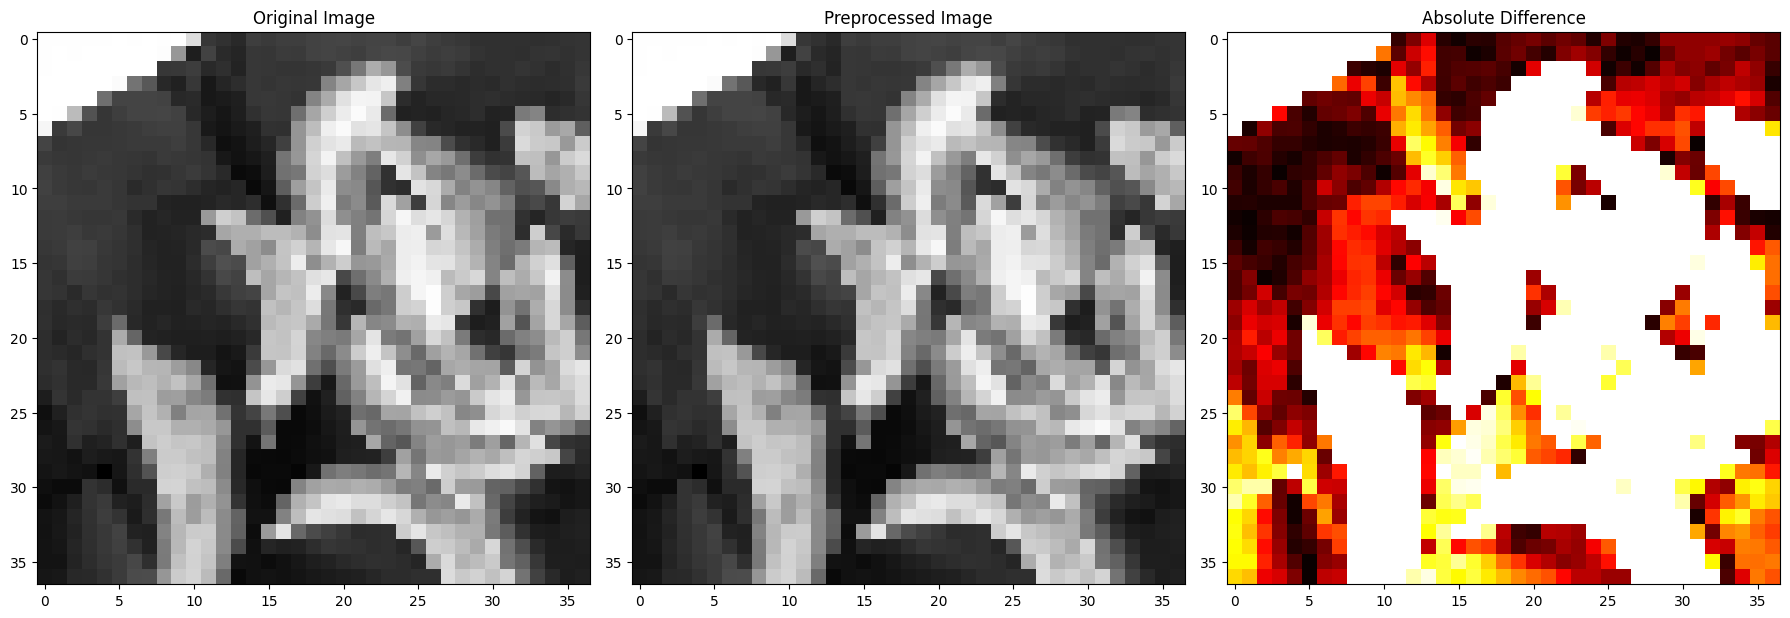

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains original images and X_train_normalized contains preprocessed images

# Compute the absolute difference between original and preprocessed images
diff_image = np.abs(X_train_preprocessed_37[0] - X_train_37[0])

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original image
axs[0].imshow(X_train_37[0], cmap='Greys')
axs[0].set_title('Original Image')

# Plot the preprocessed image
axs[1].imshow(X_train_preprocessed_37[0], cmap='Greys')
axs[1].set_title('Preprocessed Image')

# Plot the absolute difference image
axs[2].imshow(diff_image, cmap='hot', vmax=np.max(diff_image)*0.2)  # Adjust vmax for better contrast
axs[2].set_title('Absolute Difference')

# Adjust layout
plt.tight_layout()
plt.show()

- From these images, we can observe the impact of preprocessing on the original images.The difference image highlights areas where the pixel values have changed between the original and preprocessed images. Darker regions indicate areas where the pixel values increased during preprocessing, while brighter regions represent areas where the pixel values decreased.

- If a pixel value increased, it means that its intensity was higher in the preprocessed image compared to the original. Conversely, if a pixel value decreased, it means that its intensity was lower in the preprocessed image.

## Data Augmentation

- Augmenting the data to add more data to the training set and altering this data so that the model can learn and classify alot better, in varios scenarios

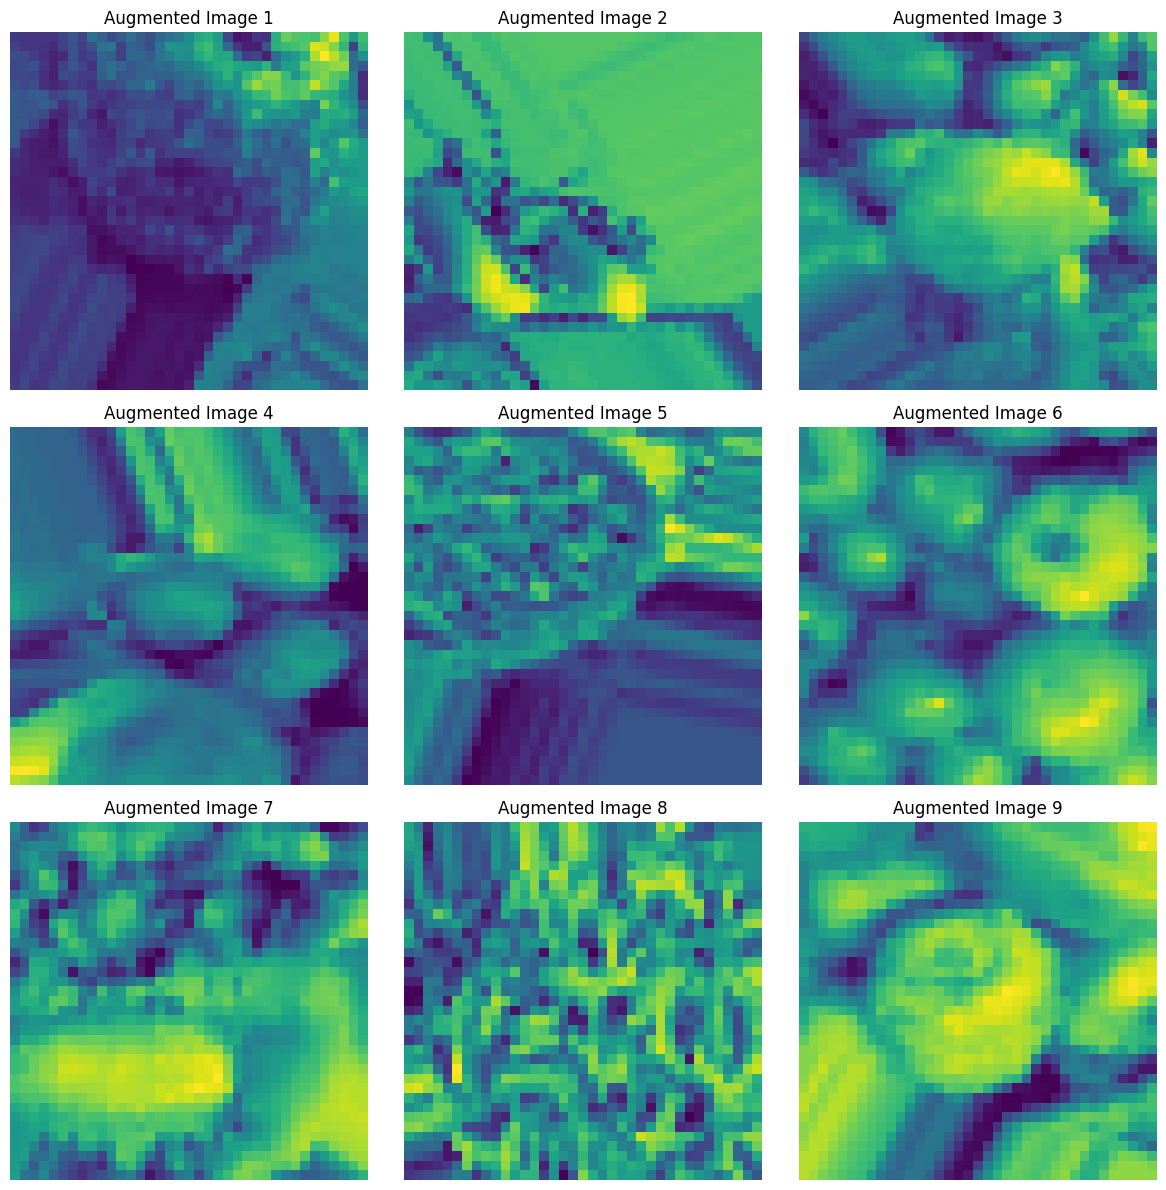

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=90,        # Rotation between -45 and 45 degrees
    width_shift_range=0.3,    # Horizontal shift up to 20% of image width
    height_shift_range=0.3,   # Vertical shift up to 20% of image height
    shear_range=0.3,          # Shear transformation up to 30%
    zoom_range=0.3,           # Zoom up to 30%
    horizontal_flip=True,     # Horizontal flip
    vertical_flip=True         # Vertical flip
)

train_generator = train_datagen.flow(X_train_preprocessed_37, y_train_37, batch_size=9032, shuffle=True)
X_train_aug, y_train_aug = next(train_generator)

X_train_preprocessed_37 = np.concatenate((X_train_preprocessed_37, X_train_aug), axis=0)
y_train_37 = np.concatenate((y_train_37, y_train_aug), axis=0)


# Visualize the augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_aug[i])
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}', fontsize=12)  # Add title for each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [20]:
print("Shape of X_train:", X_train_preprocessed_37.shape)
print("Shape of X_val:", X_val_preprocessed_37.shape)
print("Shape of X_test:", X_test_preprocessed_37.shape)

X_val_preprocessed_37 = X_val_preprocessed_37.numpy()
X_test_preprocessed_37 = X_test_preprocessed_37.numpy()

print("\n")

print("Shape of y_train:", y_train_37.shape)
print("Shape of y_val:", y_val_37.shape)
print("Shape of y_test:", y_test_37.shape)

Shape of X_train: (18064, 37, 37, 1)
Shape of X_val: (3000, 37, 37, 1)
Shape of X_test: (3000, 37, 37, 1)


Shape of y_train: (18064, 15)
Shape of y_val: (3000, 15)
Shape of y_test: (3000, 15)


## Early Stopping Callback

- Helps to automatically stop the training process of a model when certain criterias are met

In [21]:
# Define early stopping callback
Early_Stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience = 16,           # Stop training after 12 epochs with no improvement
    restore_best_weights=True  # Restore the weights that give the best validation loss
)

# Building a Baseline Model using CNN ( 2-Convolutional-Layer )

- Bulding my Baseline Model to show the improvement in my Final Model

In [22]:
# Define the simple model architecture
simple_model = Sequential([
    Conv2D(16, (3, 3), input_shape=(37, 37, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(15, activation='softmax'),
])
# Compile the model
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = simple_model.fit(X_train_preprocessed_37, y_train_37, epochs = 100, batch_size = 200, validation_data=(X_val_preprocessed_37, y_val_37), callbacks = [Early_Stopping], verbose = 1)

# Evaluate the model on the test set
test_loss, test_accuracy = simple_model.evaluate(X_test_preprocessed_37, y_test_37)


print("Test Loss: {:.2f}".format(test_loss))
print("Test Accuracy: {:.2%}".format(test_accuracy))

Epoch 1/100
91/91 [==============================] - 13s 12ms/step - loss: 2.3988 - accuracy: 0.2359 - val_loss: 2.5368 - val_accuracy: 0.1597
Epoch 2/100
91/91 [==============================] - 1s 9ms/step - loss: 1.9786 - accuracy: 0.3686 - val_loss: 2.2146 - val_accuracy: 0.3227
Epoch 3/100
91/91 [==============================] - 1s 9ms/step - loss: 1.7931 - accuracy: 0.4304 - val_loss: 1.8612 - val_accuracy: 0.4317
Epoch 4/100
91/91 [==============================] - 1s 9ms/step - loss: 1.6624 - accuracy: 0.4745 - val_loss: 1.5453 - val_accuracy: 0.5540
Epoch 5/100
91/91 [==============================] - 1s 9ms/step - loss: 1.5703 - accuracy: 0.5063 - val_loss: 1.3198 - val_accuracy: 0.6203
Epoch 6/100
91/91 [==============================] - 1s 9ms/step - loss: 1.4956 - accuracy: 0.5277 - val_loss: 1.2397 - val_accuracy: 0.6317
Epoch 7/100
91/91 [==============================] - 1s 9ms/step - loss: 1.4274 - accuracy: 0.5526 - val_loss: 1.1552 - val_accuracy: 0.6503
Epoch 8/100

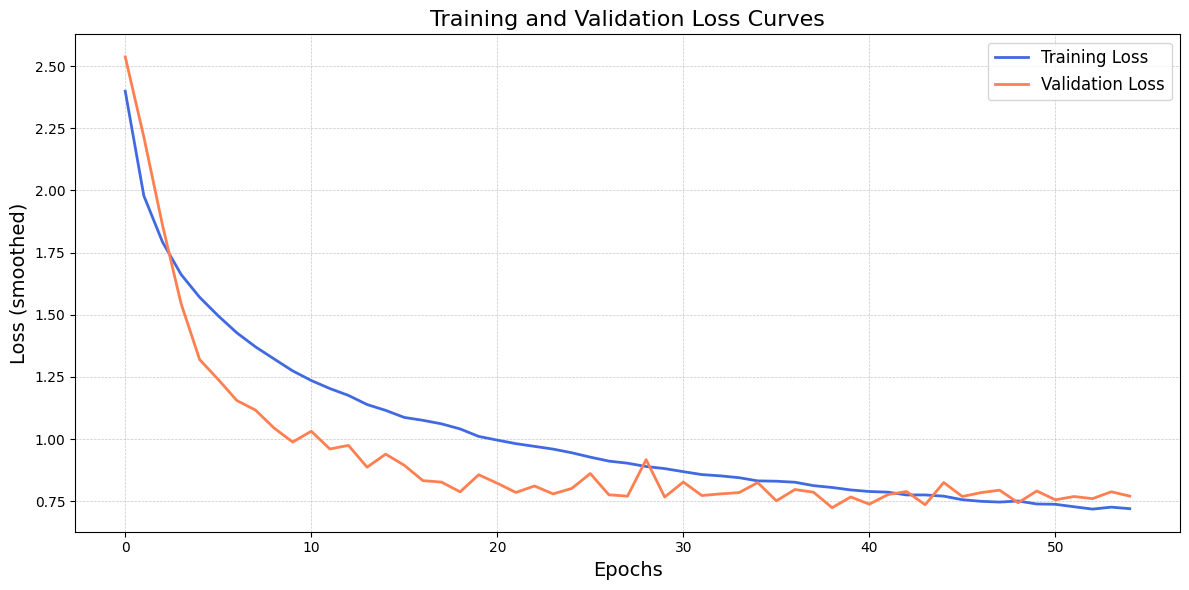

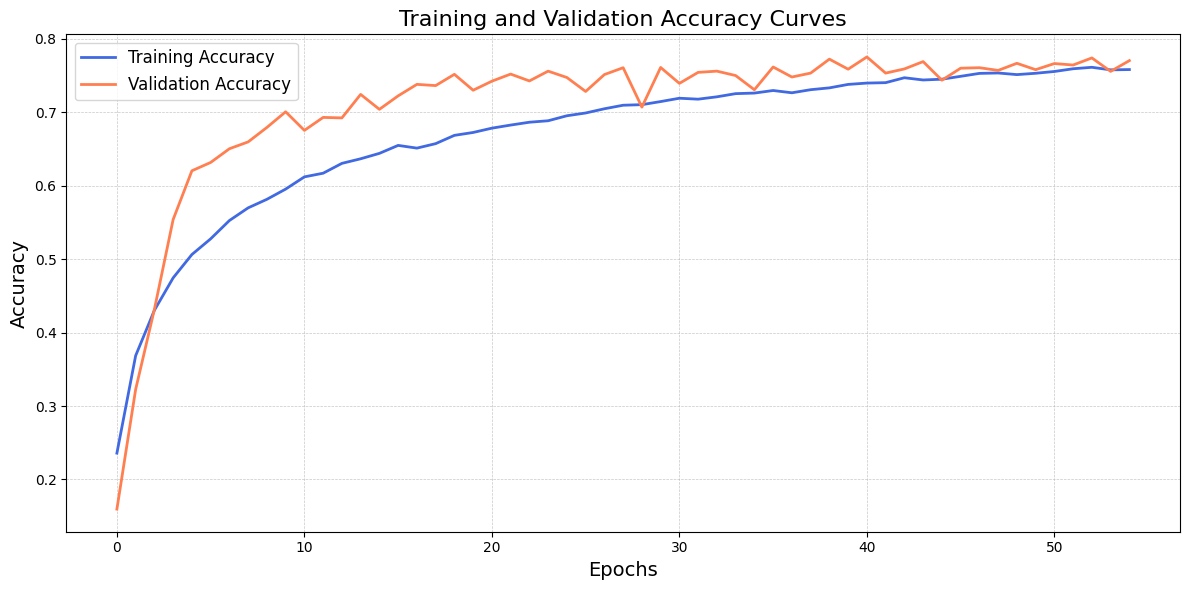

In [23]:
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot 1: Loss Curves with Smoothing
epochs = range(len(history.history['loss']))  # Extract epochs for smoother line
plt.plot(epochs, history.history['loss'], label='Training Loss', color='royalblue', linewidth=2)
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='coral', linewidth=2)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (smoothed)', fontsize=14)  # Indicate smoothed loss
plt.legend(fontsize=12, loc='upper right')  # Improved legend placement
plt.title('Training and Validation Loss Curves', fontsize=16)  # Larger title
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # More refined grid
plt.tight_layout()
plt.show()

# Plot 2: Accuracy Curves with Clear Labels
plt.figure(figsize=(12, 6))

plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='royalblue', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='coral', linewidth=2)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12, loc='upper left')  # Improved legend placement
plt.title('Training and Validation Accuracy Curves', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Model Analysis

- **(1) Loss**
  - **Observation**: Both the training loss and validation loss curves appear to decrease as the number of epochs increases. This suggests that the model is learning from the training data and improving its performance on the validation data. However, the training loss is consistently higher than the validation loss.
  - **Conclusion**: There are a couple of possible explanations for this. One possibility is that the model is starting to overfit to the training data. This means that the model is learning the specific patterns of the training data too well, and it may not be able to generalize well to new, unseen data.

- **(2) Accuracy**

  - **Observation**:The training accuracy curve starts lower than the validation accuracy curve, but increases steadily throughout the epochs.
The validation accuracy curve also increases throughout the epochs, but at a slower and more gradual pace compared to the training accuracy curve.
The training accuracy curve reaches a peak value around epoch 20, and then fluctuates slightly.
The validation accuracy curve reaches its highest value around epoch 30.


  - **Observation**: The model is likely experiencing overfitting. This is because the training accuracy is significantly higher than the validation accuracy, especially in the later epochs. Overfitting occurs when the model learns the training data too well, including noise or irrelevant patterns, which hinders its ability to generalize well to unseen data.
The validation accuracy curve suggests that the model is still learning and improving its ability to generalize to unseen data even after epoch 15.


# Hyperparameter Tuning Values

- For the Hyperparameter Tuning, I did it manually as it was too intensive to use KerasTuner for my computer
- The tuning I did was for the Number of filters, Number of Dense Units and Kernel Size and Dropout rates


- **(1) Number of filters:**
  - **Range: 32 to 256**: 
  - **Step: 32**: 
  - **Description**: The number of kernel filters in each convolutional layer. This parameter determines the depth of the output volume.

- **(2) Number of Dense Units:**
  - **Range: 64 to 512**: 
  - **Step: 32**:
  - **Description**: This represents the number of neurons or units in the dense (fully connected) layer.

- **(3)Kernel Size:**
  - **Values: (3x3), (5x5), (7x7)**: 
  - **Desciption**: The kernel size specifies the dimensions of the convolutional window. It determines the spatial extent of each convolution operation within the input data.

- **(4) Dropout rates for each layer (dropout_rate):**
  - **Range: 0.1 to 0.5**: 
  - **Step: 0.1**:
  - **Desciption**: The fraction of the input units to drop (set to zero) during training for regularization. This helps prevent overfitting by randomly setting a fraction of input units to zero at each update during training
  

- After doing the manual hyperparameter tuning, I found out the best values to use were **128 filters**, **512 Dense Units**, **(3x3) Kernel size**, **0.4 Dropout Value**

## Model Building and Model Improvement

- Experimenting with different numbers of layers in order to be able to get the Best Model

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Function to create CNN model
def create_cnn_model(num_conv_layers, num_dense_layers, num_filters=128, kernel_size=(3, 3)):
    model = Sequential()
    for i in range(num_conv_layers):
        if i == 0:
            model.add(Conv2D(num_filters, kernel_size, input_shape=(37, 37, 1), activation='relu', padding='same'))
        else:
            model.add(Conv2D(num_filters, kernel_size, activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    for _ in range(num_dense_layers):
        model.add(Dense(512, activation='relu'))
    model.add(Dense(15, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the number of convolutional and dense layers to experiment with
num_conv_layers_list = [3, 4, 5]
num_dense_layers_list = [1, 2, 3, 4]

best_accuracy = 0.0
best_loss = float('inf')
best_model_configuration = None

# Train and evaluate models with different configurations
for num_conv_layers in num_conv_layers_list:
    for num_dense_layers in num_dense_layers_list:
        print(f"Number of Conv Layers: {num_conv_layers}, Number of Dense Layers: {num_dense_layers}")
        
        # Create the model
        model = create_cnn_model(num_conv_layers, num_dense_layers)
        
        # Define ReduceLROnPlateau callback
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
        
        # Train the model with ReduceLROnPlateau callback
        model.fit(X_train_preprocessed_37, y_train_37, validation_data=(X_val_preprocessed_37, y_val_37), 
                  epochs=100, batch_size=128, class_weight=class_weights, callbacks=[Early_Stopping, reduce_lr], verbose=0)
        
        # Evaluate the model
        loss, accuracy = model.evaluate(X_test_preprocessed_37, y_test_37, verbose=0)
        print("Test Loss: %.4f, Test Accuracy: %.2f%%" % (loss, accuracy * 100))  # Print test accuracy

        # Update best model configuration based on accuracy and loss
        if accuracy > best_accuracy or (accuracy == best_accuracy and loss < best_loss):
            best_accuracy = accuracy
            best_loss = loss
            best_model_configuration = (num_conv_layers, num_dense_layers)

print("\nBest Model Configuration - Number of Conv Layers: %d, Number of Dense Layers: %d, Test Loss: %.4f, Test Accuracy: %.2f%%" % (best_model_configuration[0], best_model_configuration[1], best_loss, best_accuracy * 100))


Number of Conv Layers: 3, Number of Dense Layers: 1
Test Loss: 0.1638, Test Accuracy: 95.40%
Number of Conv Layers: 3, Number of Dense Layers: 2
Test Loss: 0.1821, Test Accuracy: 95.50%
Number of Conv Layers: 3, Number of Dense Layers: 3
Test Loss: 0.1866, Test Accuracy: 94.20%
Number of Conv Layers: 3, Number of Dense Layers: 4
Test Loss: 0.1875, Test Accuracy: 95.57%
Number of Conv Layers: 4, Number of Dense Layers: 1
Test Loss: 0.1817, Test Accuracy: 95.03%
Number of Conv Layers: 4, Number of Dense Layers: 2
Test Loss: 0.1752, Test Accuracy: 95.97%
Number of Conv Layers: 4, Number of Dense Layers: 3
Test Loss: 0.1989, Test Accuracy: 94.20%
Number of Conv Layers: 4, Number of Dense Layers: 4
Test Loss: 0.2029, Test Accuracy: 94.90%
Number of Conv Layers: 5, Number of Dense Layers: 1
Test Loss: 0.2488, Test Accuracy: 94.07%
Number of Conv Layers: 5, Number of Dense Layers: 2
Test Loss: 0.3462, Test Accuracy: 90.10%
Number of Conv Layers: 5, Number of Dense Layers: 3
Test Loss: 0.3820,

# Best Model Accuracy and Loss

In [25]:
best_num_conv_layers = best_model_configuration[0]
best_num_dense_layers = best_model_configuration[1]

# Create the best model based on the best parameters
best_model = create_cnn_model(best_num_conv_layers, best_num_dense_layers)

# Train the best model on the entire dataset
history = best_model.fit(X_train_preprocessed_37, y_train_37, validation_data=(X_val_preprocessed_37, y_val_37), epochs = 100, batch_size=200, callbacks = [Early_Stopping], verbose=1)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_preprocessed_37, y_test_37)
print("Test Loss: %.4f, Test Accuracy: %.2f%%" % (test_loss, test_accuracy * 100))

Epoch 1/100
91/91 [==============================] - 5s 26ms/step - loss: 2.3233 - accuracy: 0.2167 - val_loss: 2.1563 - val_accuracy: 0.2643
Epoch 2/100
91/91 [==============================] - 2s 21ms/step - loss: 1.9402 - accuracy: 0.3531 - val_loss: 1.3678 - val_accuracy: 0.5460
Epoch 3/100
91/91 [==============================] - 3s 37ms/step - loss: 1.6009 - accuracy: 0.4701 - val_loss: 1.0736 - val_accuracy: 0.6503
Epoch 4/100
91/91 [==============================] - 3s 34ms/step - loss: 1.3483 - accuracy: 0.5539 - val_loss: 0.8409 - val_accuracy: 0.7223
Epoch 5/100
91/91 [==============================] - 3s 34ms/step - loss: 1.1531 - accuracy: 0.6201 - val_loss: 0.7363 - val_accuracy: 0.7633
Epoch 6/100
91/91 [==============================] - 3s 34ms/step - loss: 1.0039 - accuracy: 0.6649 - val_loss: 0.5745 - val_accuracy: 0.8190
Epoch 7/100
91/91 [==============================] - 3s 34ms/step - loss: 0.9077 - accuracy: 0.6985 - val_loss: 0.5209 - val_accuracy: 0.8340
Epoch 

# Reading Model Summary

In [26]:
print(best_model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 37, 37, 128)       1280      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 18, 18, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 18, 18, 128)       147584    
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 9, 9, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 9, 9, 128)         147584    
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 4, 4, 128)      

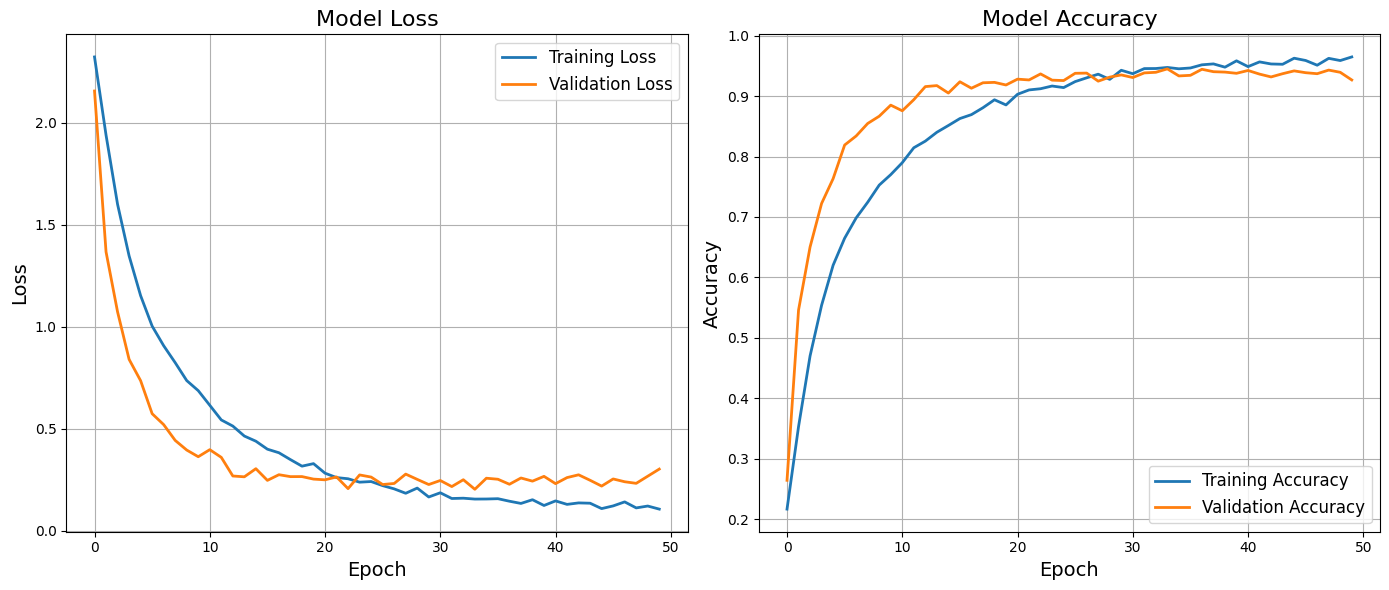

In [27]:
import matplotlib.pyplot as plt

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    plt.figure(figsize=(14, 6))  # Increase the figure size

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# Assuming `history` is the variable that stores the training history
plot_training_history(history)

# Testing on Random Images found on Google

1/1 [==============================] - 0s 21ms/step
Top 3 predictions for Cauliflower.jpeg:
1. Cauliflower: 0.9920
2. Cabbage: 0.0080
3. Bitter Gourd: 0.0000
The model predicts that the image is a: Cauliflower



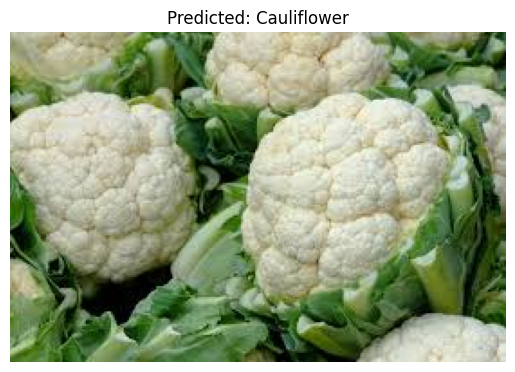

1/1 [==============================] - 0s 22ms/step
Top 3 predictions for Tomato.jpeg:
1. Tomato: 1.0000
2. Bean: 0.0000
3. Brinjal: 0.0000
The model predicts that the image is a: Tomato



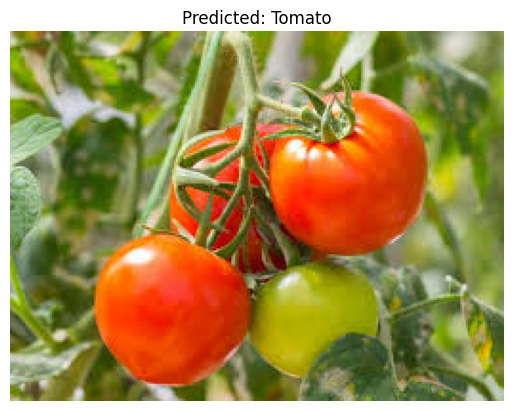

1/1 [==============================] - 0s 15ms/step
Top 3 predictions for Bottle_Gourd.jpg:
1. Bitter Gourd: 1.0000
2. Cucumber: 0.0000
3. Bean: 0.0000
The model predicts that the image is a: Bitter Gourd



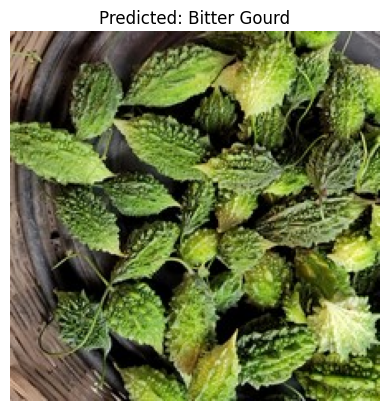

1/1 [==============================] - 0s 18ms/step
Top 3 predictions for Capsicum.jpg:
1. Capsicum: 0.9995
2. Bottle Gourd: 0.0005
3. Bean: 0.0000
The model predicts that the image is a: Capsicum



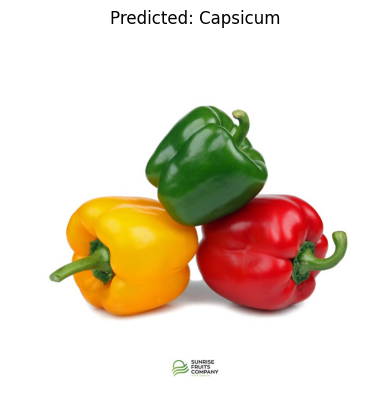

1/1 [==============================] - 0s 26ms/step
Top 3 predictions for Radish.jpeg:
1. Radish: 0.9997
2. Cauliflower: 0.0003
3. Tomato: 0.0000
The model predicts that the image is a: Radish



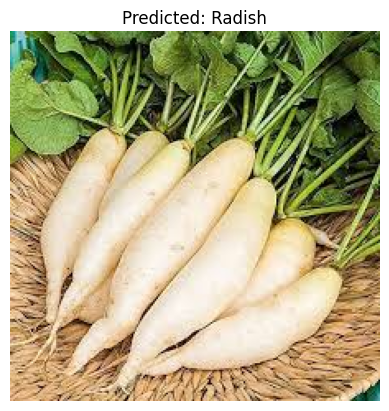

1/1 [==============================] - 0s 38ms/step
Top 3 predictions for Carrot.jpg:
1. Bean: 1.0000
2. Broccoli: 0.0000
3. Cucumber: 0.0000
The model predicts that the image is a: Bean



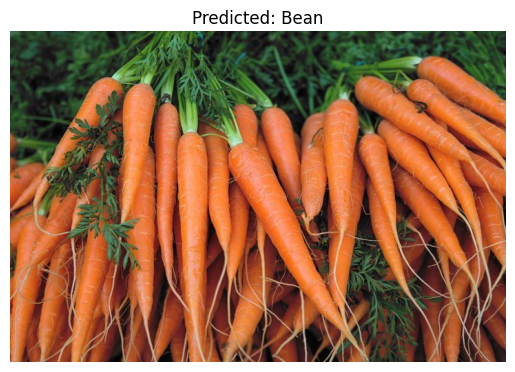

In [38]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image based off previous preprocessing
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image to [0, 1]
    img_array = pre_processing_v1(img_array)
    return img_array

# Path to the folder containing images
folder_path = 'Model_Deployment/'  # Replace with the path to your folder
target_size = (37, 37)  # Replace with your model's input size

# Assuming you have a list of class names
class_names = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 
               'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Process each image in the folder
for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    
    # Only process files with image extensions (you can add more extensions if needed)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        img_array = preprocess_image(img_path, target_size)

        # Make a prediction
        predictions = best_model.predict(img_array)

        # Get the top 3 predictions
        top_3_indices = np.argsort(predictions[0])[-3:][::-1]
        top_3_predictions = [(class_names[i], predictions[0][i]) for i in top_3_indices]

        # Get the index of the highest predicted probability
        predicted_class_index = top_3_indices[0]
        predicted_class = class_names[predicted_class_index]

        # Print the top 3 results
        print(f'Top 3 predictions for {img_name}:')
        for i, (class_name, probability) in enumerate(top_3_predictions):
            print(f'{i+1}. {class_name}: {probability:.4f}')

        # Print the final predicted class
        print(f'The model predicts that the image is a: {predicted_class}\n')

        # Display the image with the predicted label
        plt.imshow(image.load_img(img_path))
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
        plt.show()


# **Final Model Analysis**

- In our final analysis, it's evident that this model did well in capturing the intricate patterns within the data. Its ability to generalize effectively to new samples indicates its reliability and robustness. With consistent performance across various evaluation metrics, this model emerges as a dependable solution for this classfication task. One of the few areas where the model lacked accuracy, happens to be when testing on real world Carrot images. After much research, I have come to the conclusion that this is because, the training data for carrots, had the leafy part of the carrots cut off for most of the images, which is what made carrots unique. Thus, this could've caused to model to look out for other stuff in the carrots, which were evident in the other vegetables, casuing it to wrongfully classify carrots

# **131 Pixels vs 37 Pixels Comparison**

- After doing our analysis, we can see that the 137 Pixels model performed better than our 37 Pixels Model as it showed a higher Best Model Accuracy of about 2% as compared to the 37 Pixels model. After doing some research, I found an explanation for this.



- **(1) Higher Resolution and Detail Capture:**
  - **More Information:**: A 131x131 image has significantly more pixels (17,161) than a 37x37 image (1,369), capturing finer details and nuances essential for accurate classification.
  - **Feature Richness**:  More pixels allow the model to detect subtle variations in textures, edges, and patterns.


- **(2) Better Representation of Objects**
  - **Spatial Relationships:**: Higher resolution images better capture spatial relationships, crucial for models like CNNs that rely on spatial hierarchies.

- **(3) Reduced Loss of Crucial Information:**:
  - **Noise and Artifacts**:  Higher resolution images help reduce noise and artifacts that can confuse the model.

- **(4) Increased Learning Capacity**:
  - **Regularization:**:  Higher resolution images can help avoid overfitting to noisy, low-resolution features.